In [1]:
import pandas as pd
import numpy as np

In [2]:
df_teamstats = pd.read_csv("data/AmericanFootball98.csv")
df_sb = pd.read_csv("data/superbowl.csv")

In [3]:
df_teamstats.drop(df_teamstats.columns[33:], axis=1, inplace=True)
df_sb.drop(df_sb.columns[6:], axis=1, inplace=True)
df_sb.drop(0, inplace=True)

#changes date to year
df_sb['Year'] = pd.to_datetime(df_sb['Date']).dt.year
df_sb.drop(labels = 'Date', axis=1, inplace=True)

#changes sb roman number to just int
df_sb['SB'] = df_sb['SB'].str.replace(r'[a-zA-Z]', '', regex=True)
df_sb['SB'] = df_sb['SB'].str.replace(r'\(|\)', '', regex=True)

#moves year
column_to_move = df_sb.pop("Year")
df_sb.insert(0, "Year", column_to_move)

In [4]:
#Extracting the team names and years from df_teamstats
df_teamstats['Team'] = df_teamstats['team_code'].str.extract(r'([A-Za-z]{3})')
df_teamstats['Year'] = df_teamstats['team_code'].str.extract(r'(\d{4})')

#reorder columns
column_to_move = df_teamstats.pop("Year")
df_teamstats.insert(0, "Year", column_to_move)
column_to_move = df_teamstats.pop("Team")
df_teamstats.insert(1, "Team", column_to_move)

#delete team_code
df_teamstats = df_teamstats.drop('team_code', axis=1)
df_teamstats

,Year,Team,wins,losses,PF,yards,plays,yards/play,TO,Fumbles Lost,...,pen yards,pen 1st downs,number drives,score percentage,turnover percentage,avg start,avg time per drive,avg plays per drive,avg yards per drive,avg points per drive
0,2019,nwe,12,4,420,5664,1095,5.2,15,6,...,828,31,185,36.8,7.6,Own 32.5,2:40,5.97,29.9,1.99
1,2019,buf,10,6,314,5283,1018,5.2,19,7,...,927,32,183,30.6,10.4,Own 28.9,2:34,5.62,28.6,1.66
2,2019,nyj,7,9,276,4368,956,4.6,25,9,...,1105,30,183,23.0,11.5,Own 26.4,2:28,5.23,23.1,1.21
3,2019,mia,5,11,306,4960,1022,4.9,26,8,...,769,41,180,30.6,13.3,Own 27.6,2:33,5.78,27.1,1.63
4,2019,rav,14,2,531,6521,1064,6.1,15,7,...,867,27,163,52.1,8.6,Own 28.9,3:22,6.61,39.3,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,1999,ram,13,3,526,6412,994,6.5,31,16,...,889,26,188,39.9,15.4,Own 31.5,2:42,5.44,34.1,2.37
665,1999,car,8,8,421,5686,982,5.8,34,19,...,857,21,192,38.0,15.1,Own 32.7,2:27,5.26,29.6,2.14
666,1999,atl,5,11,285,4542,931,4.9,35,16,...,968,26,184,25.0,17.4,Own 30.2,2:30,5.17,24.6,1.42
667,1999,sfo,4,12,295,5380,1012,5.3,32,13,...,1045,26,182,26.9,15.9,Own 28.5,2:40,5.69,29.5,1.42


In [5]:
#Dictionaries
sb_dict = {
    "New England Patriots":1,
    "Miami Dolphins":2,
    "Buffalo Bills":3,
    "New York Jets":4,
    "Cincinnati Bengals":5,
    "Pittsburgh Steelers":6,
    "Baltimore Ravens":7,
    "Cleveland Browns": 8, #team has not been to the SB yet
    "Baltimore Colts":9,
    "Indianapolis Colts":10, #2nd Colts Team
    "Jacksonville Jaguars":11, #team has not been to the SB yet
    "Tennessee Titans":12, 
    "Houston Texans":13, #team has not been to the SB yet
    "Denver Broncos":14,
    "Kansas City Chiefs":15,
    "San Diego Chargers":16, #omitted LA Chargers, no SB appearance
    "Oakland Raiders":17, #omitted LV Raiders, no SB appearance
    "Los Angeles Raiders":18, #2nd Raiders Team
    "New York Giants":19,
    "Washington Redskins":20, #omitted Commanders, no SB appearance
    "Dallas Cowboys":21,
    "Philadelphia Eagles":22,
    "Chicago Bears":23,
    "Minnesota Vikings":24,
    "Detroit Lions":"Lions", #team has not been to SB yet
    "Green Bay Packers":25,
    "Tampa Bay Buccaneers":26,
    "Carolina Panthers":27,
    "Atlanta Falcons":28,
    "New Orleans Saints":29,
    "Seattle Seahawks":30,
    "St. Louis Rams":31,
    "Los Angeles Rams":32, #2nd Rams Team
    "Arizona Cardinals":33,
    "San Francisco 49ers":34
}

team_dict = {
    "Patriots": 1,
    "mia":2,
    "buf":3,
    "nyj":4,
    "cin":"Bengals",
    "pit":"Steelers",
    "rav":"Ravens",
    "cle":"Browns",
    "clt":"Colts",
    "jax":"Jaguars",
    "oti":"Titans",
    "htx":"Texans",
    "den":"Broncos",
    "kan":"Chiefs",
    "sdg":"Chargers",
    "rai":"Raiders",
    "nyg":"Giants",
    "was":"Redskins",
    "dal":"Cowboys",
    "phi":"Eagles",
    "chi":"Bears",
    "min":"Vikings",
    "det":"Lions",
    "gnb":"Packers",
    "tam":"Buccaneers",
    "car":"Panthers",
    "atl":"Falcons",
    "nor":"Saints",
    "sea":"Seahawks",
    "ram":"Rams",
    "crd":"Cardinals",
    "sfo":"49ers"
}

In [6]:
import pandas as pd

df_teamstats = pd.read_csv("data/AmericanFootball98.csv")
df_sb = pd.read_csv("data/superbowl.csv")

df_teamstats = df_teamstats[['team_code', 'wins', 'losses', 'PF', 'yards', 'plays', 
                            '1st downs', 'completions', 'pass attempts', 'pass yards', 
                            'rush yards', 'score percentage', 'opp PF', 'opp yards', 'opp plays']]


df_teamstats['team_name'] = df_teamstats['team_code'].str[:3]
df_teamstats['year'] = df_teamstats['team_code'].str[-4:]
df_teamstats = df_teamstats.drop(columns=['team_code'])

df_teamstats['year'] = pd.to_numeric(df_teamstats['year'])

# drop all rows from 2004 and older
df_teamstats = df_teamstats[df_teamstats['year'] > 2004]

cols = ['team_name', 'year'] + [col for col in df_teamstats.columns if col not in ['team_name', 'year']]
df_teamstats = df_teamstats[cols]


# mapping of team abbreviations to full names
team_mapping = {
    'nwe': 1,
    'buf': 2,
    'nyj': 3,
    'mia': 4,
    'rav': 5,
    'pit': 6,
    'cle': 7,
    'cin': 8,
    'htx': 9,
    'oti': 10,
    'clt': 11,
    'jax': 12,
    'kan': 13,
    'den': 14,
    'rai': 15,
    'sdg': 16,
    'phi': 17,
    'dal': 18,
    'nyg': 19,
    'was': 20,
    'gnb': 21,
    'min': 22,
    'chi': 23,
    'det': 24,
    'nor': 25,
    'atl': 26,
    'tam': 27,
    'car': 28,
    'sfo': 29,
    'sea': 30,
    'ram': 31,
    'crd': 32
}

sb_dict = {
    "New England Patriots":1,
    "Miami Dolphins":2,
    "Buffalo Bills":3,
    "New York Jets":4,
    "Cincinnati Bengals":5,
    "Pittsburgh Steelers":6,
    "Baltimore Ravens":7,
    "Cleveland Browns": 8, #team has not been to the SB yet
    "Baltimore Colts":9,
    "Indianapolis Colts":10, #2nd Colts Team
    "Jacksonville Jaguars":11, #team has not been to the SB yet
    "Tennessee Titans":12, 
    "Houston Texans":13, #team has not been to the SB yet
    "Denver Broncos":14,
    "Kansas City Chiefs":15,
    "San Diego Chargers":16, #omitted LA Chargers, no SB appearance
    "Oakland Raiders":17, #omitted LV Raiders, no SB appearance
    "Los Angeles Raiders":18, #2nd Raiders Team
    "New York Giants":19,
    "Washington Redskins":20, #omitted Commanders, no SB appearance
    "Dallas Cowboys":21,
    "Philadelphia Eagles":22,
    "Chicago Bears":23,
    "Minnesota Vikings":24,
    "Detroit Lions":"Lions", #team has not been to SB yet
    "Green Bay Packers":25,
    "Tampa Bay Buccaneers":26,
    "Carolina Panthers":27,
    "Atlanta Falcons":28,
    "New Orleans Saints":29,
    "Seattle Seahawks":30,
    "St. Louis Rams":31,
    "Los Angeles Rams":32, #2nd Rams Team
    "Arizona Cardinals":33,
    "San Francisco 49ers":34
}


df_teamstats['team_name'] = df_teamstats['team_name'].map(team_mapping)

df_sb = df_sb[['Date', 'Winner']]
df_sb['Date'] = df_sb['Date'].str[-4:]

df_sb['Date'] = pd.to_numeric(df_sb['Date'])

# drop all rows from 2004 and older
df_sb = df_sb[df_sb['Date'] > 2004]


df_sb.rename(columns={'Date': 'year'}, inplace=True)

df_merged = pd.merge(df_teamstats, df_sb, on='year', how='left')
df_merged.rename(columns={'Winner': 'winner'}, inplace=True)

df_merged['winner'] = df_merged['winner'].map(sb_dict)

df_merged

,team_name,year,wins,losses,PF,yards,plays,1st downs,completions,pass attempts,pass yards,rush yards,score percentage,opp PF,opp yards,opp plays,winner
0,1,2019,12,4,420,5664,1095,338,378,620,3961,1703,36.8,225,4414,948,1
1,2,2019,10,6,314,5283,1018,314,299,513,3229,2054,30.6,259,4772,985,1
2,3,2019,7,9,276,4368,956,253,323,521,3111,1257,23.0,359,5170,1037,1
3,4,2019,5,11,306,4960,1022,315,371,615,3804,1156,30.6,494,6364,1053,1
4,5,2019,14,2,531,6521,1064,386,289,440,3225,3296,52.1,282,4809,921,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,25,2005,3,13,235,5031,1017,312,308,553,3343,1688,26.4,398,4994,946,1
476,30,2005,13,3,452,5915,1020,361,307,474,3458,2457,38.9,271,5069,1041,1
477,31,2005,6,10,363,5571,1025,314,392,599,4036,1535,32.3,429,5602,1007,1
478,32,2005,5,11,311,5575,1075,304,419,670,4437,1138,34.0,387,4729,936,1


In [7]:
df_merged

,team_name,year,wins,losses,PF,yards,plays,1st downs,completions,pass attempts,pass yards,rush yards,score percentage,opp PF,opp yards,opp plays,winner
0,1,2019,12,4,420,5664,1095,338,378,620,3961,1703,36.8,225,4414,948,1
1,2,2019,10,6,314,5283,1018,314,299,513,3229,2054,30.6,259,4772,985,1
2,3,2019,7,9,276,4368,956,253,323,521,3111,1257,23.0,359,5170,1037,1
3,4,2019,5,11,306,4960,1022,315,371,615,3804,1156,30.6,494,6364,1053,1
4,5,2019,14,2,531,6521,1064,386,289,440,3225,3296,52.1,282,4809,921,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,25,2005,3,13,235,5031,1017,312,308,553,3343,1688,26.4,398,4994,946,1
476,30,2005,13,3,452,5915,1020,361,307,474,3458,2457,38.9,271,5069,1041,1
477,31,2005,6,10,363,5571,1025,314,392,599,4036,1535,32.3,429,5602,1007,1
478,32,2005,5,11,311,5575,1075,304,419,670,4437,1138,34.0,387,4729,936,1


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f23fd9e0040>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f21e0c9ed30>
Traceback 

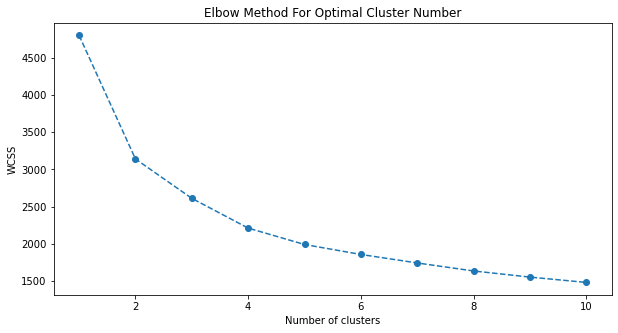

For n_clusters = 2, silhouette score is 0.2781846170584844)
For n_clusters = 3, silhouette score is 0.21816280378623143)
For n_clusters = 4, silhouette score is 0.21716247066818878)
For n_clusters = 5, silhouette score is 0.2036781749073264)
For n_clusters = 6, silhouette score is 0.18334690874378304)
For n_clusters = 7, silhouette score is 0.18639097456593276)
For n_clusters = 8, silhouette score is 0.182596721401117)
For n_clusters = 9, silhouette score is 0.1921663304634017)
For n_clusters = 10, silhouette score is 0.17124210953589233)


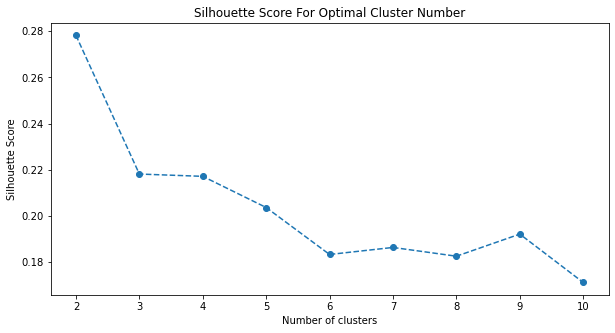

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load your dataset
# df_NFL = pd.read_csv("data/NFL_team_data.csv") # Replace with the correct path to your dataset

# Convert the 'winner' column to a binary target variable
# Assuming the 'team_name' column contains the name of the team and 'winner' column the name of the winning team for the Super Bowl
# df_NFL['won_superbowl'] = (df_NFL['team_name'] == df_NFL['winner']).astype(int)

# Prepare features for K-Means clustering
features = ['wins', 'losses', 'winner', 'PF', 'yards', 'plays', '1st downs', 'completions', 'pass attempts', 'pass yards']  # Updated to include more features
X = df_merged[features]  # Make sure to use your actual dataframe name

# Normalize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):  # for example, testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Cluster Number')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


silhouette_scores = [] 
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_scaled)
    silhouette = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)
    print("For n_clusters = {}, silhouette score is {})".format(n_cluster, silhouette))
    
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score For Optimal Cluster Number')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset
# df_NFL = pd.read_csv("data/NFL_team_data.csv") # Replace with the correct path to your dataset

# Convert the 'winner' column to a binary target variable
# Assuming the 'team_name' column contains the name of the team and 'winner' column the name of the winning team for the Super Bowl
# df_NFL['won_superbowl'] = (df_NFL['team_name'] == df_NFL['winner']).astype(int)

# Prepare features for K-Means clustering
features = ['wins', 'losses', 'winner', 'PF', 'yards', 'plays', '1st downs', 'completions', 'pass attempts', 'pass yards']  # Updated to include more features
X = df_merged[features]  # Make sure to use your actual dataframe name

# Normalize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Now, use the clusters as a feature for SVM classification
df_merged['Cluster'] = clusters  # Make sure to use your actual dataframe name
y = df_merged['Cluster']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM model for classification
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict the classification for a new scaled data point
new_data_point = scaler.transform([[5, 3, 1, 5, 6, 9, 1, 4, 3, 1]])  # Example: 5 wins, 3 losses, 0 ties
predicted_cluster = svm_model.predict(new_data_point)
print("Predicted Cluster for New Data Point:", predicted_cluster)

# Predict if this hypothetical team would win the Super Bowl according to the SVM model
teams_in_cluster = df_merged[df_merged['Cluster'] == predicted_cluster[0]]['team_name'].tolist()
print("Teams in Predicted Cluster:", teams_in_cluster)

Accuracy: 0.9479166666666666
Predicted Cluster for New Data Point: [3]
Teams in Predicted Cluster: [3, 6, 14, 20, 4, 2, 3, 8, 10, 12, 20, 32, 3, 8, 7, 11, 23, 7, 31, 29, 31, 29, 3, 7, 12, 10, 15, 22, 27, 31, 3, 15, 27, 31, 4, 3, 10, 12, 13, 32, 4, 7, 12, 11, 14, 13, 23, 22, 30, 31, 2, 7, 10, 22, 28, 30, 29, 32, 2, 7, 15, 13, 20, 24, 27, 29, 31, 2, 8, 7, 15, 13, 20, 24, 29, 30, 31, 2, 3, 4, 13, 15, 28, 26, 29, 31, 2, 7, 10, 9, 15, 20, 28, 26, 27, 29, 2, 3, 7, 9, 23, 22, 24, 29]


In [18]:
import doctest
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
from tqdm import tqdm
from matplotlib.patches import Ellipse
# two useful data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns
# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'
6

# default figure aesthetics I'll be using,
# there are other choices, see seaborn docs
sns.set_style("white")
sns.set_context("notebook")